#### **7-7. Association(연관분석)**

In [2]:
import pandas as pd 
data = ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']
test_df = pd.DataFrame (data, columns=['product'])
test_df.head()

,product
0,a
1,a
2,b
3,b
4,a


In [5]:
from statsmodels.sandbox.stats.runs import runstest_1samp

test_df.loc[test_df['product']=='a','product']=1
test_df.loc[test_df['product']=='b','product']=0

runstest_1samp (test_df['product'], cutoff=0.5, correction=True)
# p-value 0.265로 유의수준보다 크므로 귀무가설 (연속적인 관측값이 임의적이다) 기각 불가 . 즉, 상품 a/b 구매에는 아무런 연관관계 없음

(-1.1144881152070183, 0.26506984027306035)

In [9]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 11.6 MB/s eta 0:00:00


In [10]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'],
           ['Apple', 'Beer', 'Rice'],
           ['Apple', 'Beer'],
           ['Apple', 'Bananas'],
           ['Milk', 'Beer', 'Rice', 'Chicken'],
           ['Milk', 'Beer', 'Rice'],
           ['Milk', 'Beer'],
           ['Apple', 'Bananas']]
te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
print(te.columns_)
te_ary

['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice']


array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

In [12]:
df = pd.DataFrame (te_ary, columns = te.columns_)
df

,Apple,Bananas,Beer,Chicken,Milk,Rice
0,True,False,True,True,False,True
1,True,False,True,False,False,True
2,True,False,True,False,False,False
3,True,True,False,False,False,False
4,False,False,True,True,True,True
5,False,False,True,False,True,True
6,False,False,True,False,True,False
7,True,True,False,False,False,False


In [13]:
from mlxtend.frequent_patterns import apriori
apriori (df, min_support=0.6, use_colnames=True)

,support,itemsets
0,0.625,(Apple)
1,0.750,(Beer)


In [14]:
frequent_itemsets = apriori (df, min_support=0.3, use_colnames=True)
frequent_itemsets ['length']=frequent_itemsets ['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.625,(Apple),1
1,0.750,(Beer),1
2,0.375,(Milk),1
3,0.500,(Rice),1
4,0.375,"(Beer, Apple)",2
5,0.375,"(Beer, Milk)",2
6,0.500,"(Beer, Rice)",2


In [15]:
import pandas as pd
import numpy as np

df=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/groceries.csv')
df

,"citrus fruit,semi-finished bread,margarine,ready soups"
0,"tropical fruit,yogurt,coffee"
1,whole milk
2,"pip fruit,yogurt,cream cheese,meat spreads"
3,"other vegetables,whole milk,condensed milk,lon..."
4,"whole milk,butter,yogurt,rice,abrasive cleaner"
...,...
9829,"sausage,chicken,beef,hamburger meat,citrus fru..."
9830,cooking chocolate
9831,"chicken,citrus fruit,other vegetables,butter,y..."
9832,"semi-finished bread,bottled water,soda,bottled..."


In [29]:
df_split = df.iloc[:,0].str.split(',',expand=True)
df_split.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,tropical fruit,yogurt,coffee,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,whole milk,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,pip fruit,yogurt,cream cheese,meat spreads,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,other vegetables,whole milk,condensed milk,long life bakery product,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,whole milk,butter,yogurt,rice,abrasive cleaner,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [54]:
groceries=[]
for i in range(0,len(df_split)):
    groceries.append(df_split.loc[i,:].dropna().to_list())

In [48]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
groceries_tr = te.fit_transform(groceries)
groceries_tr = pd.DataFrame (groceries_tr,columns = te.columns_)
groceries_tr

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
from mlxtend.frequent_patterns import apriori

groceries_ap = apriori (groceries_tr, min_support = 0.01, use_colnames=True)
groceries_ap

,support,itemsets
0,0.033455,(UHT-milk)
1,0.017694,(baking powder)
2,0.052471,(beef)
3,0.033252,(berries)
4,0.026032,(beverages)
...,...,...
328,0.011999,"(root vegetables, whole milk, tropical fruit)"
329,0.014541,"(root vegetables, whole milk, yogurt)"
330,0.010474,"(yogurt, soda, whole milk)"
331,0.015152,"(tropical fruit, whole milk, yogurt)"


In [52]:
from mlxtend.frequent_patterns import association_rules

association_rules(groceries_ap, metric ='confidence', min_threshold = 0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beef),(other vegetables),0.052471,0.193512,0.019727,0.375969,1.942869,1.0,0.009574,1.292384,0.512171,0.087191,0.226236,0.238957
1,(beef),(root vegetables),0.052471,0.109010,0.017389,0.331395,3.040058,1.0,0.011669,1.332612,0.708220,0.120677,0.249594,0.245455
2,(beef),(whole milk),0.052471,0.255542,0.021253,0.405039,1.585018,1.0,0.007844,1.251271,0.389532,0.074113,0.200813,0.244103
3,(berries),(other vegetables),0.033252,0.193512,0.010270,0.308869,1.596118,1.0,0.003836,1.166909,0.386326,0.047440,0.143035,0.180971
4,(berries),(whole milk),0.033252,0.255542,0.011796,0.354740,1.388187,1.0,0.003299,1.153733,0.289254,0.042584,0.133249,0.200450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,"(yogurt, soda)",(whole milk),0.027354,0.255542,0.010474,0.382900,1.498382,1.0,0.003484,1.206381,0.341968,0.038447,0.171074,0.211943
121,"(tropical fruit, whole milk)",(yogurt),0.042302,0.139516,0.015152,0.358173,2.567255,1.0,0.009250,1.340679,0.637444,0.090909,0.254109,0.233387
122,"(tropical fruit, yogurt)",(whole milk),0.029286,0.255542,0.015152,0.517361,2.024564,1.0,0.007668,1.542474,0.521334,0.056184,0.351691,0.288326
123,"(yogurt, whipped/sour cream)",(whole milk),0.020744,0.255542,0.010881,0.524510,2.052539,1.0,0.005580,1.565664,0.523661,0.040996,0.361293,0.283544


In [53]:
rules = association_rules(groceries_ap, metric ='lift', min_threshold = 1)

rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))
rules[ (rules['antecedent_len']>=2)&(rules['confidence'] >=0.4)&(rules['lift']>=3)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedent_len
418,"(root vegetables, citrus fruit)",(other vegetables),0.017694,0.193512,0.010372,0.586207,3.029300,1.0,0.006948,1.949012,0.681957,0.051646,0.486920,0.319903,2
491,"(root vegetables, tropical fruit)",(other vegetables),0.021049,0.193512,0.012304,0.584541,3.020692,1.0,0.008231,1.941197,0.683334,0.060835,0.484854,0.324062,2


#### **7-8. Time Series**

In [68]:
import pandas as pd
import numpy as np

data=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/arima_data.csv', names=['day','price'])
data.head()

,day,price
0,2013-01-01,3794
1,2013-02-01,3863
2,2013-03-01,5190
3,2013-04-01,5783
4,2013-05-01,6298


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     60 non-null     object
 1   price   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [70]:
import datetime
data['day']=data['day'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
#텍스트북 버전: data['day'] = pd.to_datetime(data['day'], format='%Y-%m-%d')
data.set_index ('day',inplace=True)
data.head(3)

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190


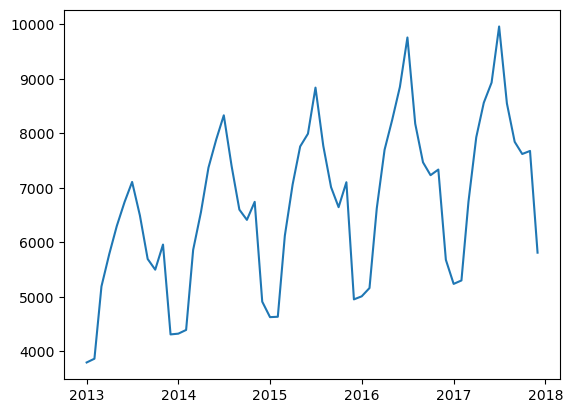

In [72]:
import matplotlib.pyplot as plt
plt.plot(data)
#plt.plot(data.index,data['price'])

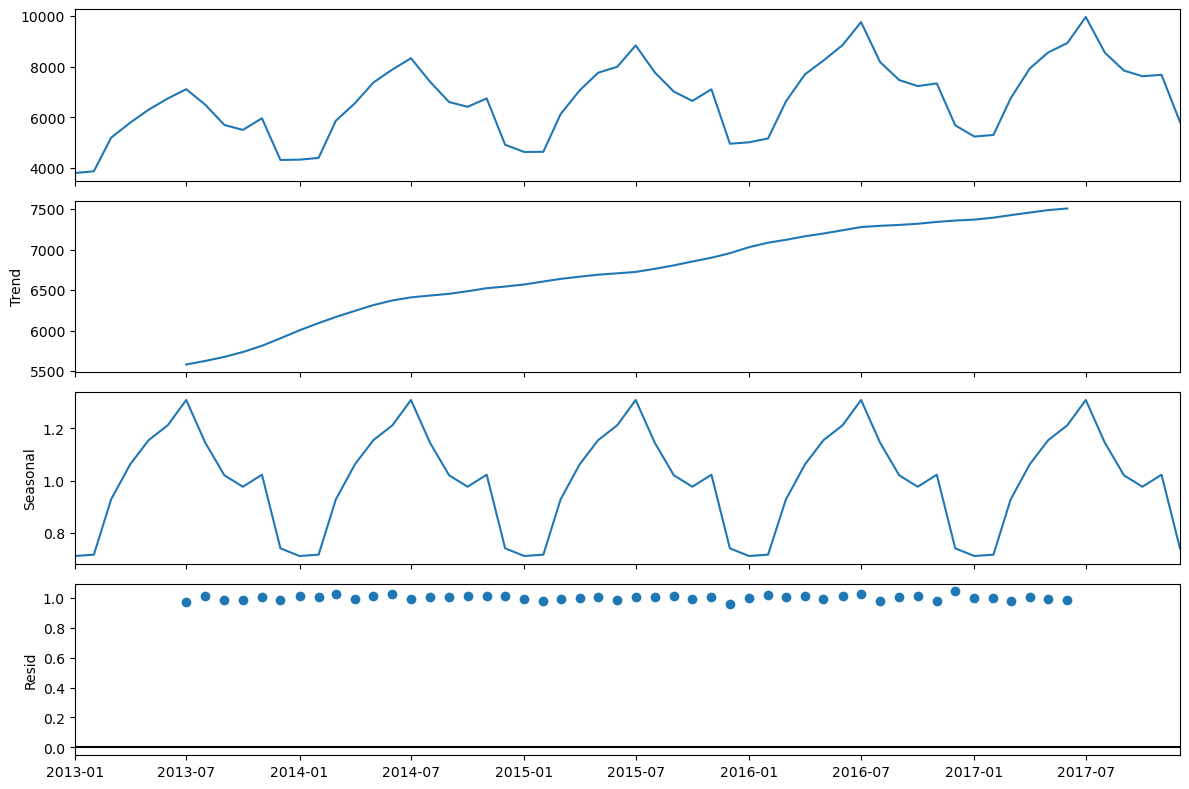

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = data
result = seasonal_decompose (ts, model='multiplicative')
plt.rcParams['figure.figsize']=[12,8]  #figure(figsize=(12,8))
result.plot()
plt.show()

In [81]:
# 정상성 검증을 위한 Augmented Dickey-Fuller Test 실행

from statsmodels.tsa.stattools import adfuller
training = data[:'2016-12-01']
test = data.drop(training.index)

adf = adfuller (training, regression = 'ct')
print('ADF statistics: %.2f' %adf[0])
print('p-value: %.2f' %adf[1])
# 귀무가설 (정상성이 없음)을 기각하지 못함. 즉, 정상성이 없기에 정상시계열을 만들기 위해 로그변환 또는 차분 필요

ADF statistics: -2.00
p-value: 0.60


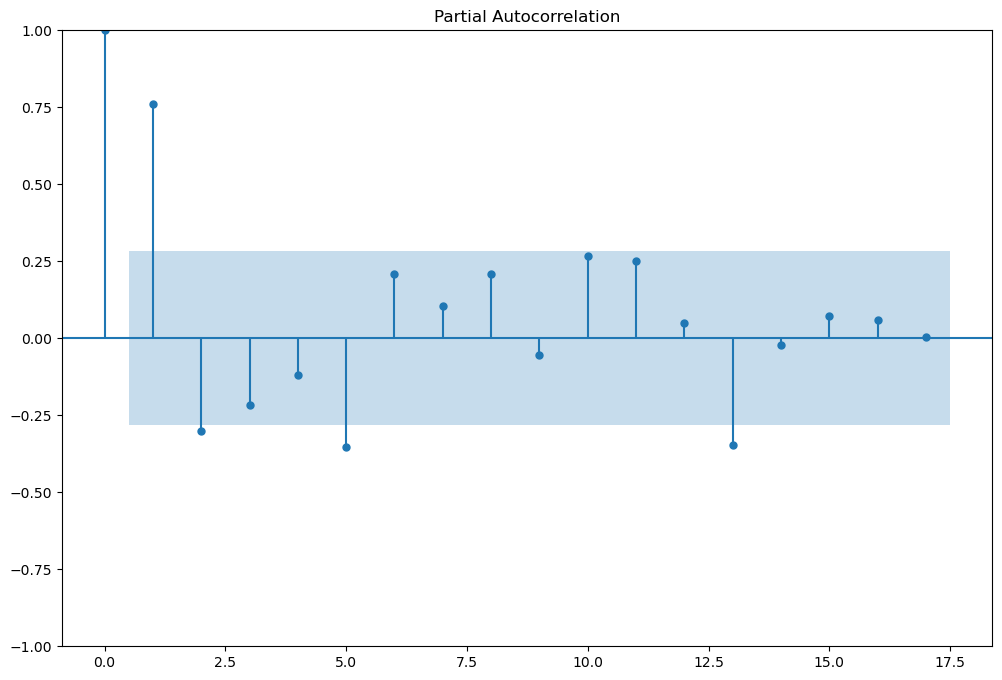

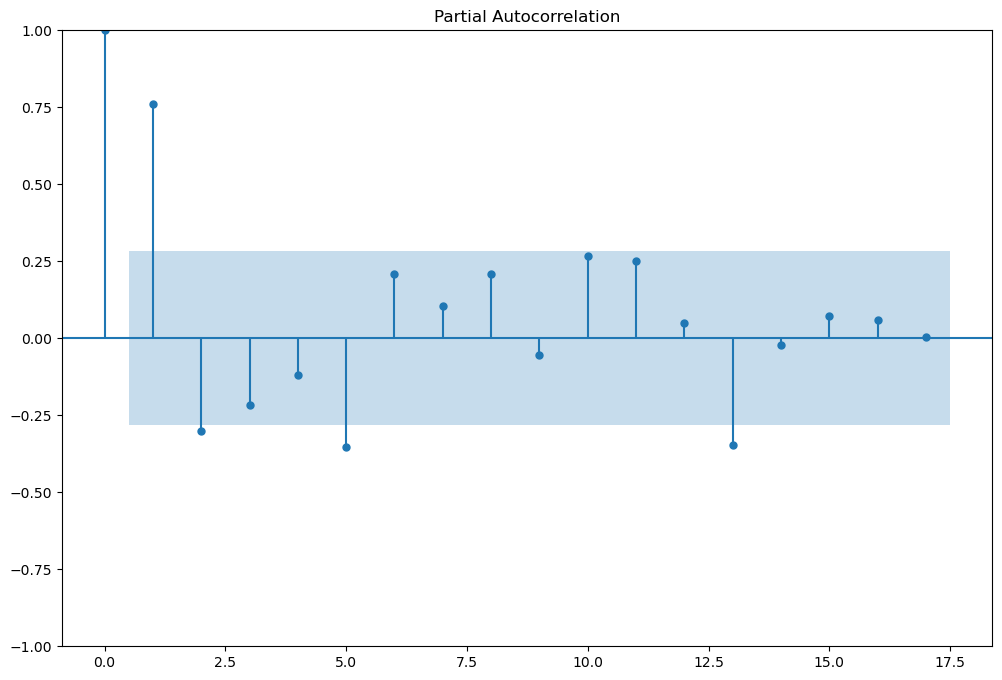

In [88]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#plot_acf(training)
plot_pacf(training)

<Axes: xlabel='day'>

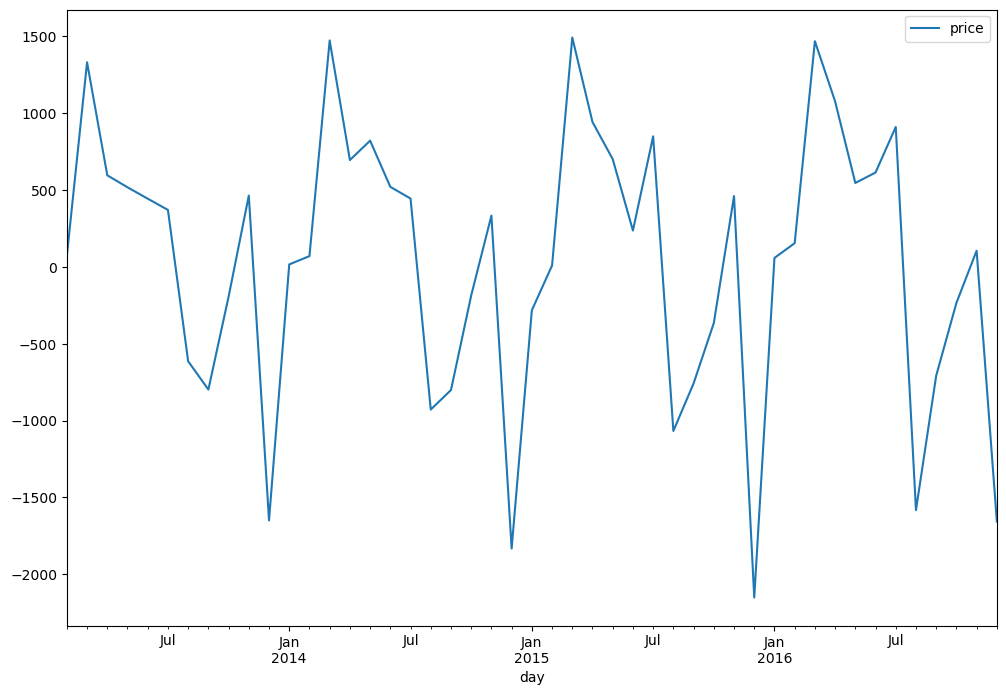

In [91]:
diff_data = training.diff(1).dropna()
diff_data.plot()
#training.plot()

In [93]:
adf = adfuller (diff_data)  # regression ='c' (상수항)이 디폴트값
print('ADF statistics: %.5f' %adf[0])
print('p-value: %.5f' %adf[1])

# 귀무가설 (정상성 없음)을 기각. 즉, 1차 차분을 통하여 정상성 확보

ADF statistics: -12.09455
p-value: 0.00000


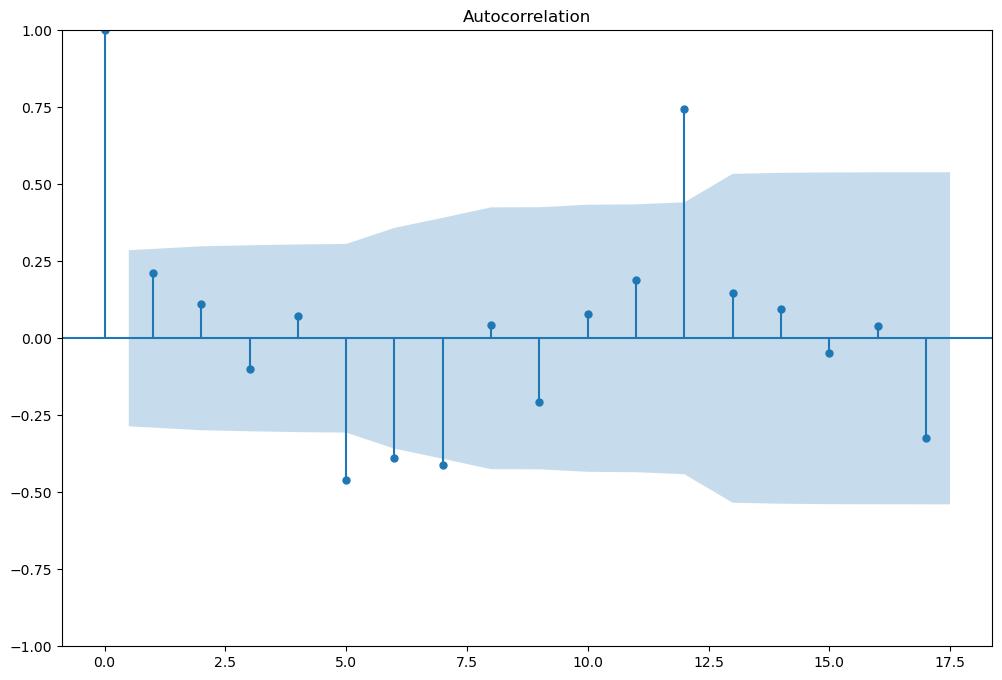

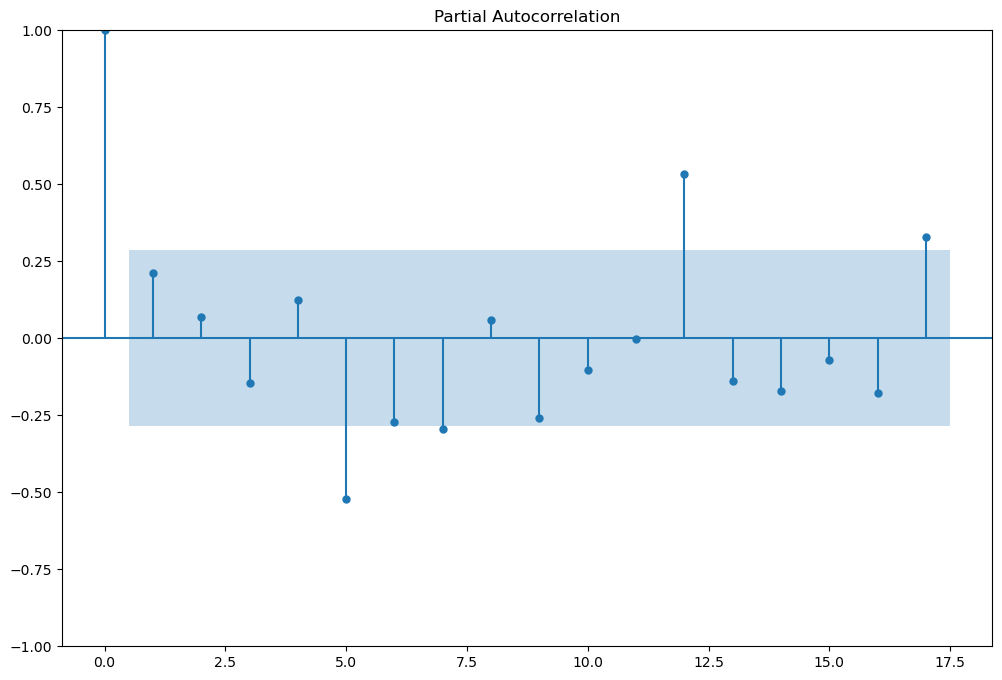

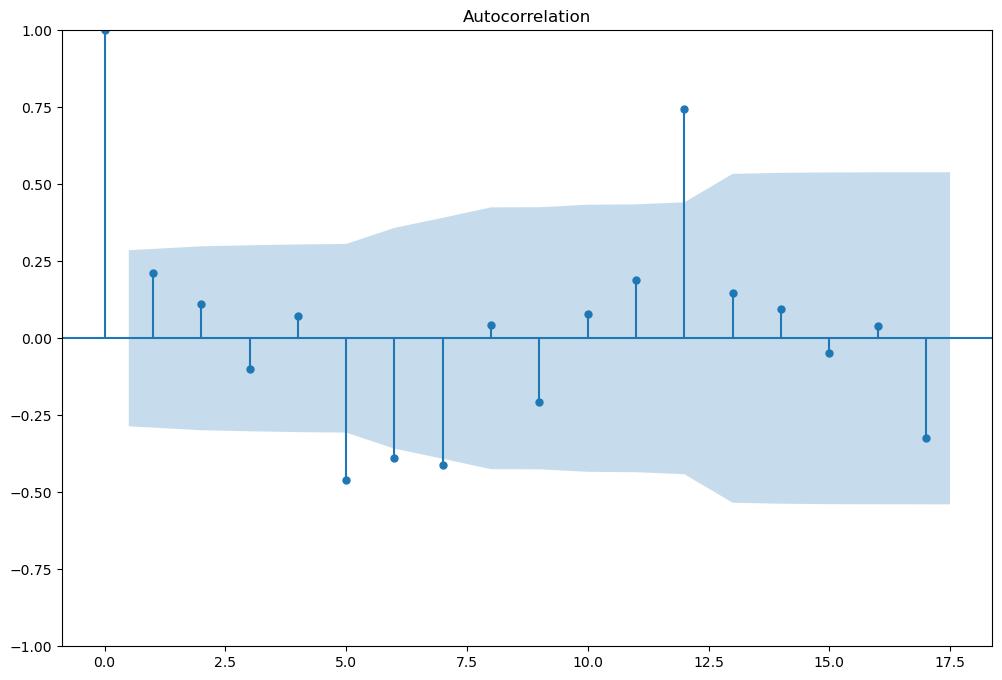

In [95]:
plot_pacf(diff_data)  # AR(p) 모형에서 p 결정
plot_acf(diff_data)   # MA(q) 모형에서 q 결정

In [99]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(training, order=(2,1,2))
res = model.fit()
res.summary()

C:\Users\sunwa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sunwa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sunwa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sunwa\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sunwa\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   48
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -375.875
Date:                Tue, 25 Mar 2025   AIC                            761.750
Time:                        21:14:41   BIC                            771.001
Sample:                    01-01-2013   HQIC                           765.231
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3168      0.190     -6.943      0.000      -1.689      -0.945
ar.L2         -0.3192      0.190     -1.676      0.094      -0.692       0.054
ma.L1          1.9700      0.242      8.124      0.000       1.495       2.445
ma.L2          0.9949      0.241      4.127      0.000       0.522       1.467
sigma2      4.451e+05   1.13e-06   3.93e+11      0.000    4.45e+05    4.45e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.74   Prob(JB):                         0.83
Heteroskedasticity (H):               1.49   Skew:                            -0.21
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.83e+26. Standard errors may be unstable.
"""

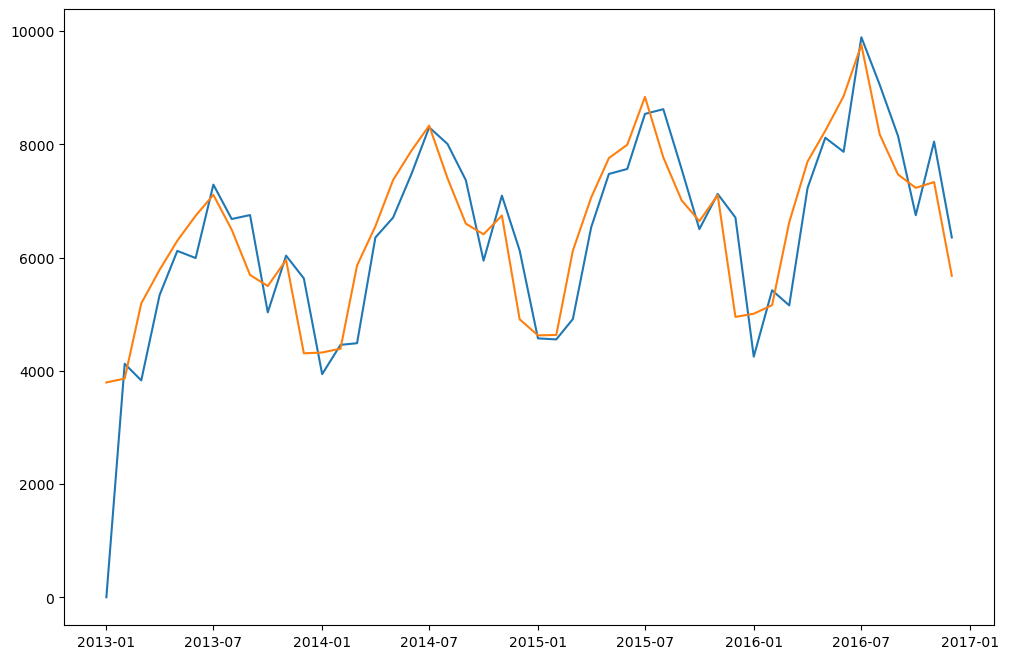

In [100]:
plt.plot(res.predict())
plt.plot(training)

In [101]:
forecast_data = res.forecast (steps=len(test), alpha=0.05)
# training 데이터 세트로부터 test 데이터 길이만큼 예측

forecast_data

C:\Users\sunwa\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


2017-01-01    5830.679305
2017-02-01    5508.495326
2017-03-01    5884.013494
2017-04-01    5492.364580
2017-05-01    5888.232141
2017-06-01    5491.957800
2017-07-01    5887.421364
2017-08-01    5493.155246
2017-09-01    5886.103351
2017-10-01    5494.508610
2017-11-01    5884.741917
2017-12-01    5495.869389
Freq: MS, Name: predicted_mean, dtype: float64

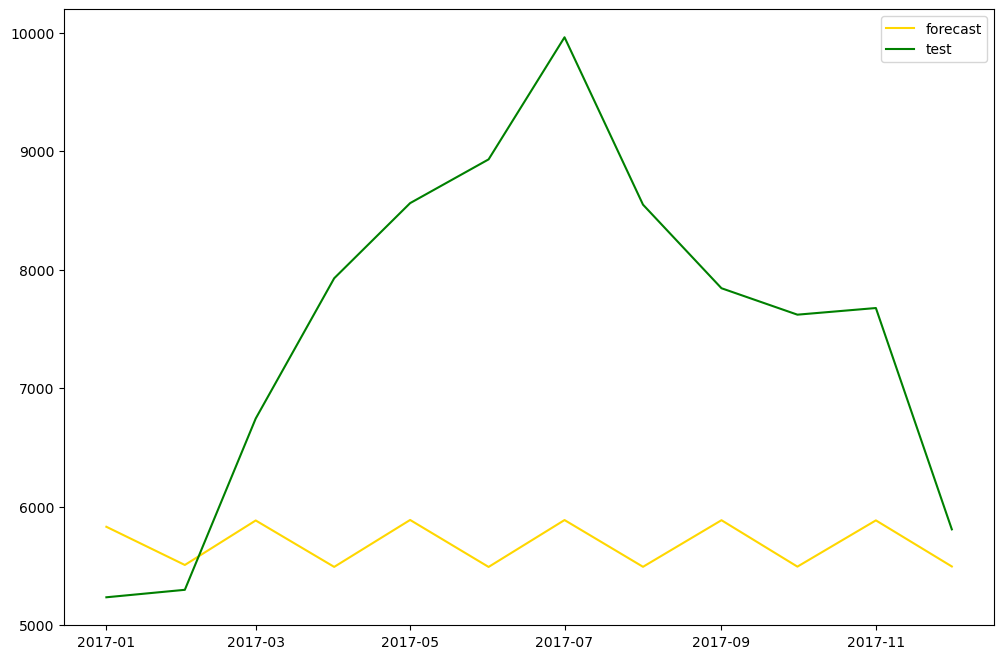

In [102]:
plt.plot(forecast_data, color='gold', label='forecast')
plt.plot(test, color='green', label='test')
plt.legend()

In [103]:
from sklearn.metrics import mean_squared_error, r2_score

print ('r2_score:',r2_score(forecast_data,test))
print ('rmse:',np.sqrt(mean_squared_error(forecast_data,test)))


r2_score: -144.26899471459083
rmse: 2302.175928094762


#### SARIMA: Seasonality를 고려한 ARIMA

In [105]:
!pip install pmdarima   
# 시계열 grid search를 위한 패키지

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   --------------------------------------- 625.1/625.1 kB 11.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --------------------------------- ------ 2.4/2.8 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 12.5 MB/s eta 0:00:00


In [107]:
from pmdarima import auto_arima

auto_model = auto_arima (training, start_p=0, max_p=3, start_q=0, max_q=3, start_P=0, max_P=3, start_Q=0, max_Q=3, 
                         d=1, m=12, seasonal=True, information_criterion='aic', trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=481.846, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=482.652, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=482.466, Time=0.06 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=483.637, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=483.669, Time=0.02 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=481.031, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=482.740, Time=0.06 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=482.616, Time=0.02 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=482.682, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=480.687, Time=0.02 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=482.403, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=48

In [108]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -238.344
Date:                             Tue, 25 Mar 2025   AIC                            480.687
Time:                                     21:31:03   BIC                            483.798
Sample:                                 01-01-2013   HQIC                           481.761
                                      - 12-01-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3185      0.177     -1.801      0.072      -0.665       0.028
sigma2      4.803e+04   1.64e+04      2.924      0.003    1.58e+04    8.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.95   Prob(JB):                         0.56
Heteroskedasticity (H):               1.56   Skew:                            -0.14
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [109]:
auto_pred_y = pd.DataFrame (auto_model.predict(n_periods=len(test)),index=test.index)
auto_pred_y.columns = ['predicted_price']
auto_pred_y

,predicted_price
day,
2017-01-01,5609.436978
2017-02-01,5761.436978
2017-03-01,7225.436978
2017-04-01,8298.436978
2017-05-01,8841.436978
2017-06-01,9452.436978
2017-07-01,10359.436978
2017-08-01,8777.436978
2017-09-01,8068.436978


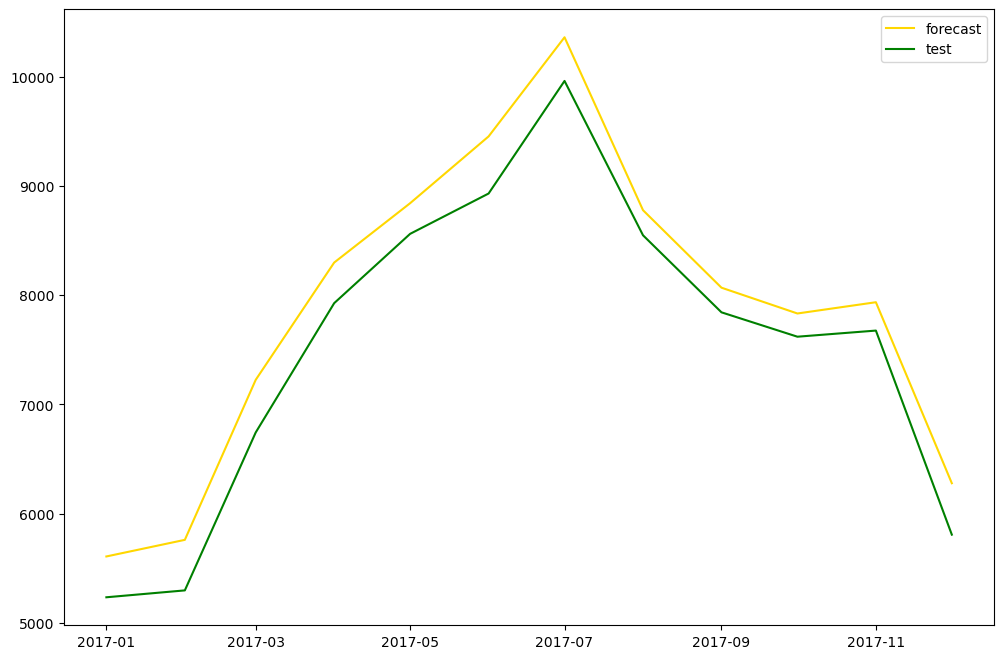

In [110]:
plt.plot(auto_pred_y, color='gold', label='forecast')
plt.plot(test, color='green', label='test')
plt.legend()

In [111]:
from sklearn.metrics import mean_squared_error, r2_score

print ('r2_score:',r2_score(auto_pred_y,test))
print ('rmse:',np.sqrt(mean_squared_error(auto_pred_y,test)))

r2_score: 0.9279530084890902
rmse: 373.206427005829
